In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data.csv', encoding='ISO-8859-1', dtype={'CustomerID' : str})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.dropna(subset=['CustomerID','Description'], inplace=True)

In [7]:
drop_sc_list = ['POST','DOT','D','CRUK','C2','BANK CHARGES']
drop_sc_idx = df[df['StockCode'].isin(drop_sc_list)].index
print('Before drop:',len(df))
df.drop(drop_sc_idx, inplace=True)
print('After drop:',len(df))

Before drop: 401604
After drop: 400153


In [8]:
# 중복되는 행들
duplicated_rows = df[df.duplicated('StockCode', keep=False)]

# 중복되는 첫 번째 행의 값을 가져옴
first_duplicated_values = duplicated_rows.drop_duplicates('StockCode').set_index('StockCode')

# 중복되는 행들의 인덱스를 가져옴
duplicated_indices = duplicated_rows.index

# 중복되는 행들의 '특정 컬럼'을 첫 번째 중복 행의 값으로 채움
df.loc[duplicated_indices, 'Description'] = df.loc[duplicated_indices, 'StockCode'].map(first_duplicated_values['Description'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
df['Total_bills'] = df['Quantity'] * df['UnitPrice']
drop_idx = df[df['Total_bills']==0].index
df.drop(drop_idx, inplace=True)
df[df['Total_bills']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
127,536381,22261,FELT EGG COSY WHITE RABBIT,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
128,536381,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
...,...,...,...,...,...,...,...,...,...
536572,581580,21803,CHRISTMAS TREE STAR DECORATION,2,2011-12-09 12:20:00,0.42,12748,United Kingdom,0.84
536573,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,2011-12-09 12:20:00,0.39,12748,United Kingdom,0.78
536574,581580,20974,12 PENCILS SMALL TUBE SKULL,1,2011-12-09 12:20:00,0.65,12748,United Kingdom,0.65
536578,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.59,12748,United Kingdom,0.59


In [10]:
total_transactions = df.groupby(['CustomerID'])['InvoiceNo'].nunique().reset_index()
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Completed
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Completed
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Completed
536640,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,Completed


In [11]:
df.insert(5, 'InvoiceMonth', df['InvoiceDate'].dt.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,2.55,17850,United Kingdom,15.30,Completed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,2.75,17850,United Kingdom,22.00,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed


# Recency

In [12]:
df_info = df.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
# 데이터셋에서 가장 마지막 날짜
most_recent_date = df['InvoiceDate'].max()
df_info['Recent_Date'] = most_recent_date
# 구매자의 가장 최근 구매 날짜
df_info['Recency'] = (df_info['Recent_Date'] - df_info['InvoiceDate']).dt.days
df_info.drop(['Recent_Date', 'InvoiceDate'], axis=1, inplace=True)
df_info.reset_index()
df_info.head()

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


# Monetary, Frequency

In [13]:
# 총 구매액, 총수량, 총 구매횟수
df_info_M = df.groupby(['CustomerID']).agg({'Total_bills' : 'sum', 'InvoiceNo' : lambda x : x.nunique()}).reset_index()
# 컬럼 변경
df_info_M.columns=['CustomerID', 'Monetary', 'Frequency']
df_info_M.head()

,CustomerID,Monetary,Frequency
0,12346,0.00,2
1,12347,4310.00,7
2,12348,1437.24,4
3,12349,1457.55,1
4,12350,294.40,1


In [14]:
# customer_df와 병합
df_info = pd.merge(df_info, df_info_M, on='CustomerID', how='left')
df_info.head()

,CustomerID,Recency,Monetary,Frequency
0,12346,325,0.00,2
1,12347,1,4310.00,7
2,12348,74,1437.24,4
3,12349,18,1457.55,1
4,12350,309,294.40,1


In [15]:
df_info = df_info[df_info['Monetary'] > 0]
len(df_info.index)

4322

In [16]:
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 5
    elif value <= boundaries[1]:
        return 4
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 2
    else:
        return 1
        
def assign_score2(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    else:
        return 5


In [17]:
r_boundaries = np.percentile(df_info['Recency'], [20, 40, 60, 80])
r_boundaries

array([ 10. ,  30. ,  69. , 173.8])

In [18]:
df_info['R_score'] = df_info['Recency'].apply(lambda x : assign_score(x, r_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score
1,12347,1,4310.00,7,5
2,12348,74,1437.24,4,2
3,12349,18,1457.55,1,4
4,12350,309,294.40,1,1
5,12352,35,1265.41,11,3


In [19]:
f_boundaries = np.percentile(df_info['Frequency'], [20, 40, 60, 80])
f_boundaries

array([1., 2., 4., 7.])

In [20]:
df_info['F_score'] = df_info['Frequency'].apply(lambda x : assign_score2(x, f_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score
1,12347,1,4310.00,7,5,4
2,12348,74,1437.24,4,2,3
3,12349,18,1457.55,1,4,1
4,12350,309,294.40,1,1,1
5,12352,35,1265.41,11,3,5


In [21]:
M_boundaries = np.percentile(df_info['Monetary'], [20, 40, 60, 80])
M_boundaries

array([ 242.302,  469.704,  905.404, 1999.954])

In [22]:
df_info['M_score'] = df_info['Monetary'].apply(lambda x : assign_score2(x, M_boundaries))
df_info.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score
1,12347,1,4310.00,7,5,4,5
2,12348,74,1437.24,4,2,3,4
3,12349,18,1457.55,1,4,1,4
4,12350,309,294.40,1,1,1,2
5,12352,35,1265.41,11,3,5,4


## MinMax Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
df_ss = df_info[['Recency', 'Monetary', 'Frequency']]
X = MinMaxScaler().fit_transform(df_ss)

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

## 최적의 k개수 구하기

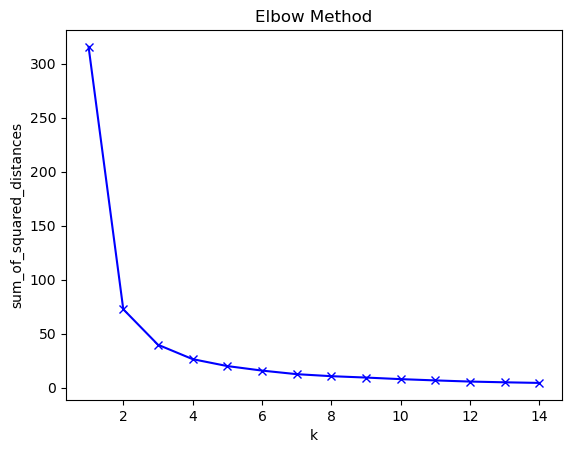

In [24]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

- Elbow Method : 군집의 개수를 정할 때, Elbow Method를 활용하여 군집을 늘려가면서 군집 내 변동성이 급감하는 군집 수를 찾음.
- 군집 내 변동성이 급감하였다는 것은 유사한 집단끼리 잘 묶였다는 의미

- 군집화를 정량적으로 평가할 수 있는 방법 중 하나로 실루엣 계수가 있다.
- 실루엣 계수의 평균값이 1일에 가까울 수록 군집화가 잘 되었다고 할 수 있다.
- 0에 가까운 경우는 군집 간 거리가 좁다는 의미로, 군집화가 잘 이루어지지 않음을 의미
- https://studying-haeung.tistory.com/10
- k = 3일때 실루엣 계수가 가장 높다.

In [25]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from matplotlib import rc
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.6476978889342075

In [26]:
kmeans_df = df_info
kmeans_df['Cluster'] = labels
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster
1,12347,1,4310.00,7,5,4,5,1
2,12348,74,1437.24,4,2,3,4,1
3,12349,18,1457.55,1,4,1,4,1
4,12350,309,294.40,1,1,1,2,0
5,12352,35,1265.41,11,3,5,4,1


In [27]:
df_ms = pd.DataFrame(X, columns=['Recency', 'Monetary', 'Frequency'])
df_ms['Cluster'] = list(kmeans_df['Cluster'])
df_ms.head()

,Recency,Monetary,Frequency,Cluster
0,0.002681,0.015466,0.024490,1
1,0.198391,0.005157,0.012245,1
2,0.048257,0.005230,0.000000,1
3,0.828418,0.001056,0.000000,0
4,0.093834,0.004541,0.040816,1


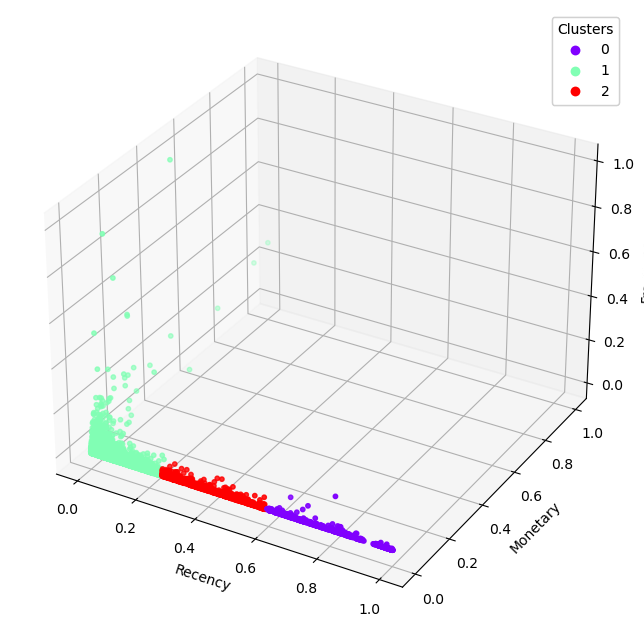

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_ms.iloc[:, 0], df_ms.iloc[:, 1], df_ms.iloc[:, 2], s=10, c = df_ms['Cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
plt.show()

In [29]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].mean()

,Recency,Monetary,Frequency
Cluster,,,
0,291.914614,425.653005,1.573071
1,29.977656,2538.971400,6.489515
2,151.258706,715.031257,2.562189


In [30]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].std()

,Recency,Monetary,Frequency
Cluster,,,
0,44.899404,1021.255649,1.778434
1,24.777646,9954.969996,10.886101
2,38.385963,908.353687,2.022258


In [31]:
kmeans_df.groupby(['Cluster'])[['Recency','Monetary','Frequency']].count()

,Recency,Monetary,Frequency
Cluster,,,
0,609,609,609
1,2909,2909,2909
2,804,804,804


## 변동계수로 가중치 구하기

In [32]:
cv_r = []
cv_f = []
cv_m = []
# 각 그룹별 변동계수 = 표준변차 / 평균 구하기
for i in range(kmeans_df['Cluster'].nunique()):
    r = kmeans_df[kmeans_df['Cluster']==i]['Recency'].std() / kmeans_df[kmeans_df['Cluster']==i]['Recency'].mean() 
    f = kmeans_df[kmeans_df['Cluster']==i]['Frequency'].std() / kmeans_df[kmeans_df['Cluster']==i]['Frequency'].mean() 
    m = kmeans_df[kmeans_df['Cluster']==i]['Monetary'].std() / kmeans_df[kmeans_df['Cluster']==i]['Monetary'].mean() 
    cv_r.append(r)
    cv_f.append(f)
    cv_m.append(m)
    
# 각 그룹별 변동계수 = 표준변차 / 평균 구하기   
w1 = min(cv_r) / (cv_r[0] + cv_r[1] + cv_r[2])
w2 = min(cv_f) / (cv_f[0] + cv_f[1] + cv_f[2])
w3 = min(cv_m) / (cv_m[0] + cv_m[1] + cv_m[2])

# w1, w2, w3의 합을 1로 만들어주기 위해 세 값을 더한 후 각각의 값을 구함
w1_r = w1 / (w1 + w2 + w3)
w2_f = w2 / (w1 + w2 + w3)
w3_m = w3 / (w1 + w2 + w3)
w1_r, w2_f, w3_m

(0.24370568417225957, 0.4290296918836615, 0.3272646239440789)

In [33]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster
1,12347,1,4310.00,7,5,4,5,1
2,12348,74,1437.24,4,2,3,4,1
3,12349,18,1457.55,1,4,1,4,1
4,12350,309,294.40,1,1,1,2,0
5,12352,35,1265.41,11,3,5,4,1


In [34]:
(5 * 0.24) + (5 * 0.42) + (5 * 0.32)

4.9

In [35]:
kmeans_df['rfm_score'] = (w1_r * kmeans_df['R_score'] + w2_f * kmeans_df['F_score'] + w3_m * kmeans_df['M_score']) / 5 * 100
kmeans_df['rfm_score'].describe()

count    4322.000000
mean       57.454079
std        24.878038
min        20.000000
25%        35.125886
50%        55.125886
75%        78.328821
max       100.000000
Name: rfm_score, dtype: float64

In [36]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score
1,12347,1,4310.00,7,5,4,5,1,91.419406
2,12348,74,1437.24,4,2,3,4,1,61.671179
3,12349,18,1457.55,1,4,1,4,1,54.258218
4,12350,309,294.40,1,1,1,2,0,26.545292
5,12352,35,1265.41,11,3,5,4,1,83.706480


In [37]:
kmeans_df.groupby(['rfm_score'])['Cluster'].count()

rfm_score
20.000000     302
24.874114     129
26.545292     160
28.580594      56
29.748227     118
             ... 
90.251773      71
91.419406      58
93.454708      57
95.125886     152
100.000000    324
Name: Cluster, Length: 115, dtype: int64

- 총 115개의 점수 범위

In [38]:
s_boundaries = np.percentile(kmeans_df['rfm_score'], [20, 40, 60, 80])
s_boundaries

array([33.09058496, 46.54529248, 64.87411368, 84.64058698])

In [39]:
def assign_score_f(value, boundaries):
    if value <= boundaries[0]:
        return 'Bronze'
    elif value <= boundaries[1]:
        return 'Silver'
    elif value <= boundaries[2]:
        return 'Gold'
    elif value <= boundaries[3]:
        return 'Platinum'
    else:
        return 'Diamond'

In [40]:
kmeans_df['membership'] = kmeans_df['rfm_score'].apply(lambda x : assign_score_f(x, s_boundaries))

In [41]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score,membership
1,12347,1,4310.00,7,5,4,5,1,91.419406,Diamond
2,12348,74,1437.24,4,2,3,4,1,61.671179,Gold
3,12349,18,1457.55,1,4,1,4,1,54.258218,Gold
4,12350,309,294.40,1,1,1,2,0,26.545292,Bronze
5,12352,35,1265.41,11,3,5,4,1,83.706480,Platinum


<Axes: xlabel='membership', ylabel='count'>

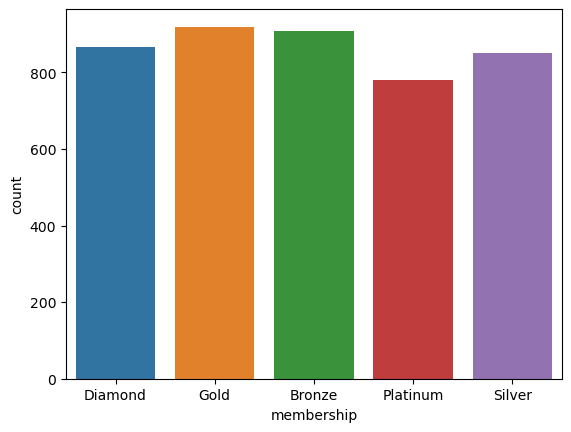

In [40]:
sns.countplot(x='membership', data=kmeans_df)

In [41]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score,membership
1,12347,1,4310.00,7,5,4,5,2,91.419406,Diamond
2,12348,74,1437.24,4,2,3,4,2,61.671179,Gold
3,12349,18,1457.55,1,4,1,4,2,54.258218,Gold
4,12350,309,294.40,1,1,1,2,1,26.545292,Bronze
5,12352,35,1265.41,11,3,5,4,2,83.706480,Platinum


In [42]:
grade_df = kmeans_df.groupby(['membership']).agg({'Recency' : 'mean', 'Frequency' : 'mean', 'Monetary' : 'mean', 'CustomerID' : 'count'}).reset_index()
grade_df.head()

,membership,Recency,Frequency,Monetary,CustomerID
0,Bronze,206.807056,1.061742,223.805800,907
1,Diamond,14.613873,14.927168,6581.047584,865
2,Gold,69.686616,2.908596,778.552776,919
3,Platinum,42.230769,5.082051,1610.540553,780
4,Silver,105.048179,1.626322,414.413584,851


In [43]:
grade_monetary = kmeans_df.groupby(['membership'])['Monetary'].sum().sort_values() / kmeans_df['Monetary'].sum() * 100

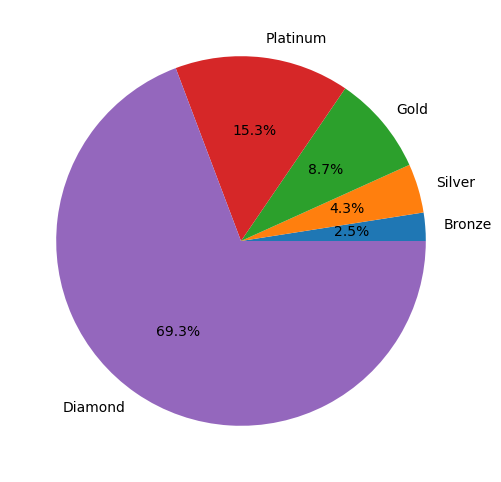

In [44]:
labels = grade_monetary.index
sizes = grade_monetary.values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.1f%%');

# 기존 데이터와 등급 데이터 합치기

In [45]:
member_df = pd.merge(df, kmeans_df, on='CustomerID', how='inner')

In [46]:
member_df.drop(['Recency', 'Monetary', 'Frequency', 'R_score', 'F_score', 'M_score', 'Cluster', 'rfm_score'], axis=1, inplace=True)
member_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12,2.55,17850,United Kingdom,15.30,Completed,Platinum
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed,Platinum
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12,2.75,17850,United Kingdom,22.00,Completed,Platinum
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed,Platinum
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12,3.39,17850,United Kingdom,20.34,Completed,Platinum


# 등급별 월별 구매비율

In [47]:
from datetime import datetime
member_df['InvoiceMonth'] = pd.to_datetime(member_df['InvoiceMonth'])
member_df.insert(6, 'Month', member_df['InvoiceMonth'].dt.month)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,12,2.55,17850,United Kingdom,15.30,Completed,Platinum
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,12,3.39,17850,United Kingdom,20.34,Completed,Platinum
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,12,2.75,17850,United Kingdom,22.00,Completed,Platinum
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,12,3.39,17850,United Kingdom,20.34,Completed,Platinum
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,12,3.39,17850,United Kingdom,20.34,Completed,Platinum


In [48]:
monthly_purchase_ratio = member_df.groupby(['membership', 'Month'])[['CustomerID']].count()
monthly_purchase_ratio = monthly_purchase_ratio / monthly_purchase_ratio.groupby(level=0).sum() * 100
monthly_purchase_ratio.reset_index(inplace=True)
monthly_purchase_ratio

,membership,Month,CustomerID
0,Bronze,1,7.714469
1,Bronze,2,8.796415
2,Bronze,3,12.304738
3,Bronze,4,9.033291
4,Bronze,5,7.836108
5,Bronze,6,6.946223
6,Bronze,7,5.960307
7,Bronze,8,5.473752
8,Bronze,9,9.238156
9,Bronze,10,11.248399


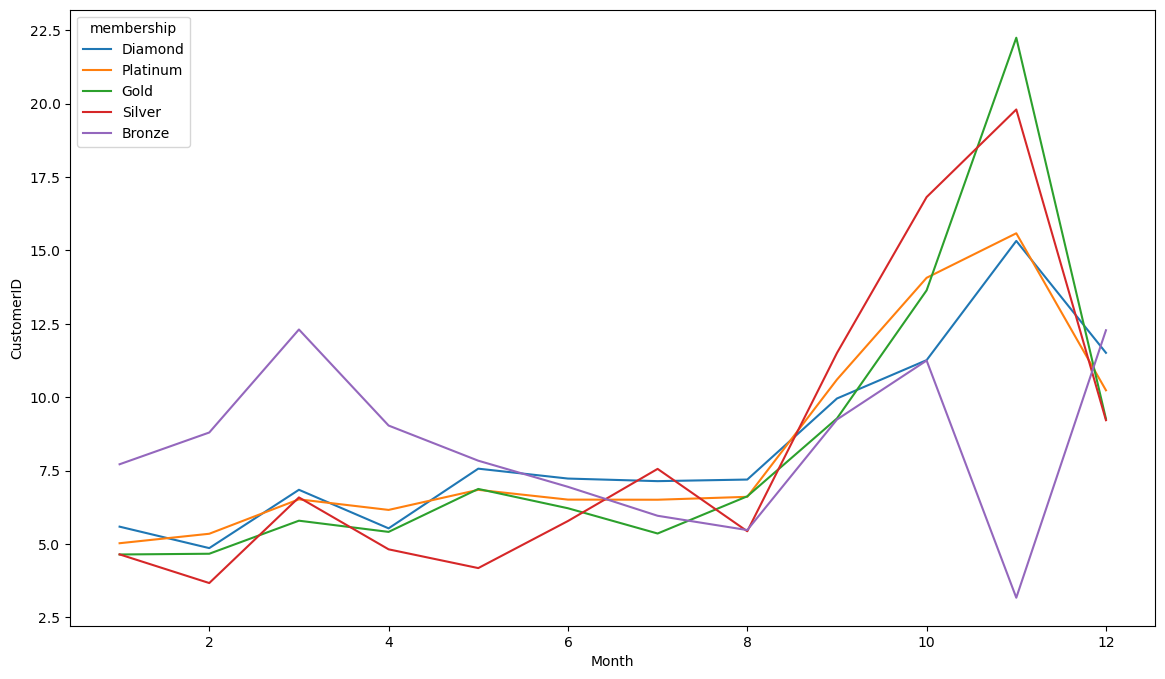

In [95]:
plt.figure(figsize=(14, 8))
hue_order = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
sns.lineplot(x='Month', y='CustomerID', hue='membership', data=monthly_purchase_ratio, hue_order = hue_order)
plt.show()

- Bronze 등급을 제외한 모든 등급에서 11월 구매비율이 가장 많았다.

# 등급별 구매 시간대

In [50]:
member_df.insert(7, 'Time', member_df['InvoiceDate'].dt.strftime('%H'))

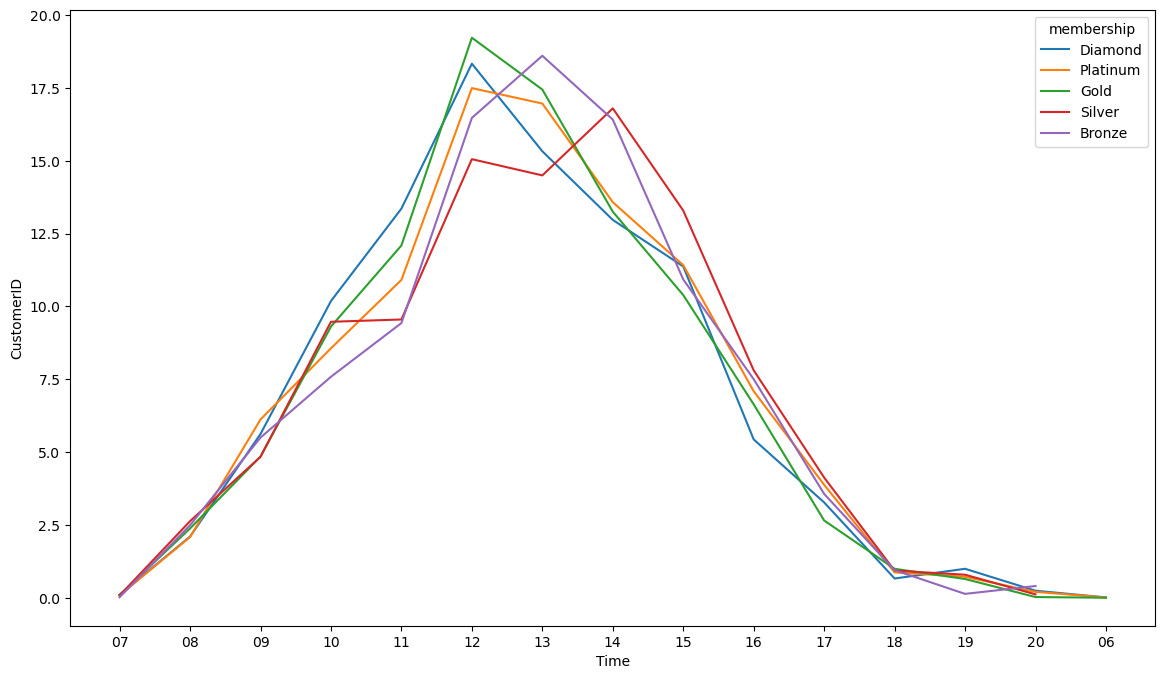

In [51]:
time_purcahse_ratio = member_df.groupby(['membership', 'Time'])[['CustomerID']].count()
time_purcahse_ratio = time_purcahse_ratio / time_purcahse_ratio.groupby(level=0).sum() * 100
time_purcahse_ratio = time_purcahse_ratio.reset_index()
plt.figure(figsize=(14, 8))
hue_order = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
sns.lineplot(x='Time', y='CustomerID', hue='membership', data=time_purcahse_ratio, hue_order = hue_order)
plt.show()

 - Diamond, Platinum, Gold 등급은 12시 전후로 구매 비율이 가장 높다.
- Bronze는 오후 1시, Silver는 2시 이후로 구매 비율이 가장 높다.

## 등급별 취소건수 비교

- outlier제거 후 진행

In [52]:
remove_outlier_idx = member_df[(member_df['Quantity'] ==member_df['Quantity'].max()) | (member_df['Quantity'] ==member_df['Quantity'].min())].index
member_df_rm = member_df.drop(remove_outlier_idx, axis=0)

In [53]:
cancelled_df = member_df_rm[member_df_rm['Transaction_Status']=='Cancelled']
cancelled_df = cancelled_df.groupby(['membership']).agg({'Quantity' : 'sum'}).reset_index()

In [54]:
completed_df = member_df_rm[member_df_rm['Transaction_Status']=='Completed']
completed_df = completed_df.groupby(['membership']).agg({'Quantity' : 'sum'}).reset_index()

In [55]:
cancel_complete_ratio = pd.merge(completed_df, cancelled_df, on='membership', how='inner')
cancel_complete_ratio

,membership,Quantity_x,Quantity_y
0,Bronze,125502,-629
1,Diamond,3386694,-79882
2,Gold,463747,-15529
3,Platinum,783782,-11702
4,Silver,232097,-5360


In [56]:
cancel_complete_ratio.rename(columns={'Quantity_x' : 'Completed', 'Quantity_y' : 'Cancelled'}, inplace=True)
cancel_complete_ratio['Ratio'] = abs(cancel_complete_ratio['Cancelled'] / cancel_complete_ratio['Completed'] * 100)
cancel_complete_ratio.sort_values(by='Ratio', ascending=False, inplace=True)
cancel_complete_ratio.head()

,membership,Completed,Cancelled,Ratio
2,Gold,463747,-15529,3.348593
1,Diamond,3386694,-79882,2.358701
4,Silver,232097,-5360,2.309379
3,Platinum,783782,-11702,1.493017
0,Bronze,125502,-629,0.501187


### 취소 건수와 총 구매 금액은 음의 상관관계를 가질 것이다.

In [58]:
member_df['Cancel'] = 0
member_df['Cancel'] = member_df.apply(lambda x : 0 if x['Transaction_Status'] == 'Completed' else 1, axis=1)
member_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,12,08,2.55,17850,United Kingdom,15.30,Completed,Platinum,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,12,08,2.75,17850,United Kingdom,22.00,Completed,Platinum,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0


In [59]:
member_df['Cancel_Quantity'] = abs(member_df['Cancel'] * member_df['Quantity'])
cancel_ratio_df = member_df.groupby(['CustomerID']).agg({'Total_bills' : 'sum', 'Quantity' : 'sum','Cancel_Quantity' : 'sum'})
cancel_ratio_df.head()

,Total_bills,Quantity,Cancel_Quantity
CustomerID,,,
12347,4310.00,2458,0
12348,1437.24,2332,0
12349,1457.55,630,0
12350,294.40,196,0
12352,1265.41,463,66


In [60]:
drop = cancel_ratio_df[cancel_ratio_df['Quantity'] == 0].index
cancel_ratio_df.drop(drop, axis=0, inplace=True)
cancel_ratio_df['Cancel_Ratio'] = cancel_ratio_df['Cancel_Quantity']/cancel_ratio_df['Quantity'] * 100
cancel_ratio_df.drop(['Quantity','Cancel_Quantity'], axis=1, inplace=True)
cancel_ratio_df.head()

,Total_bills,Cancel_Ratio
CustomerID,,
12347,4310.00,0.00000
12348,1437.24,0.00000
12349,1457.55,0.00000
12350,294.40,0.00000
12352,1265.41,14.25486


In [61]:
drop = cancel_ratio_df[cancel_ratio_df['Cancel_Ratio'] >= 1].index
cancel_ratio_df.drop(drop, axis=0, inplace=True)
cancel_ratio_df.head()

,Total_bills,Cancel_Ratio
CustomerID,,
12347,4310.00,0.0
12348,1437.24,0.0
12349,1457.55,0.0
12350,294.40,0.0
12353,89.00,0.0


<Axes: >

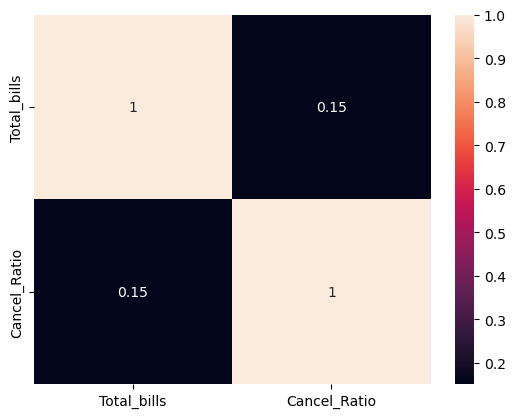

In [62]:
sns.heatmap(cancel_ratio_df.corr(), annot=True)

<Axes: xlabel='Cancel_Ratio', ylabel='Total_bills'>

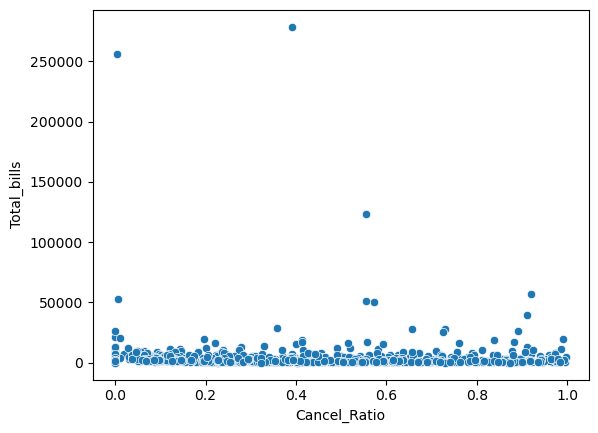

In [63]:
sns.scatterplot(data=cancel_ratio_df, x='Cancel_Ratio', y='Total_bills')

- 취소건수와 총 구매금액 사이 상관관계는 매우 약하다.

### R, F, m과 Length(이용기간)의 상관관계

In [64]:
member_df.drop(['Cancel'], axis=1, inplace=True)

In [121]:
member_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel_Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,12,08,2.55,17850,United Kingdom,15.30,Completed,Platinum,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,12,08,2.75,17850,United Kingdom,22.00,Completed,Platinum,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0


In [126]:
temp = member_df[member_df['InvoiceMonth']<'2011-12-01']
length = temp.groupby(['CustomerID'])[['InvoiceDate']].min()['InvoiceDate'].dt.month
length

CustomerID
12347    12
12348    12
12349    11
12350     2
12352     2
         ..
18280     3
18281     6
18282     8
18283     1
18287     5
Name: InvoiceDate, Length: 4281, dtype: int32

In [66]:
member_df.groupby(['CustomerID'])[['Total_bills']].sum()

,Total_bills
CustomerID,
12347,4310.00
12348,1437.24
12349,1457.55
12350,294.40
12352,1265.41
...,...
18280,180.60
18281,80.82
18282,176.60


In [127]:
# kmeans_df.drop(['R_score','F_score', 'M_score', 'membership', 'Cluster'], axis=1, inplace=True)
rfml_df = pd.merge(kmeans_df, length, on='CustomerID')
rfml_df.head()

,CustomerID,Recency,Monetary,Frequency,rfm_score,InvoiceDate
0,12347,1,4310.00,7,91.419406,12
1,12348,74,1437.24,4,61.671179,12
2,12349,18,1457.55,1,54.258218,11
3,12350,309,294.40,1,26.545292,2
4,12352,35,1265.41,11,83.706480,2


In [128]:
temp = rfml_df[['Recency', 'Monetary', 'Frequency', 'rfm_score', 'InvoiceDate']]
temp

,Recency,Monetary,Frequency,rfm_score,InvoiceDate
0,1,4310.00,7,91.419406,12
1,74,1437.24,4,61.671179,12
2,18,1457.55,1,54.258218,11
3,309,294.40,1,26.545292,2
4,35,1265.41,11,83.706480,2
...,...,...,...,...,...
4276,277,180.60,1,20.000000,3
4277,180,80.82,1,20.000000,6
4278,7,176.60,3,56.657642,8
4279,3,2045.53,16,100.000000,1


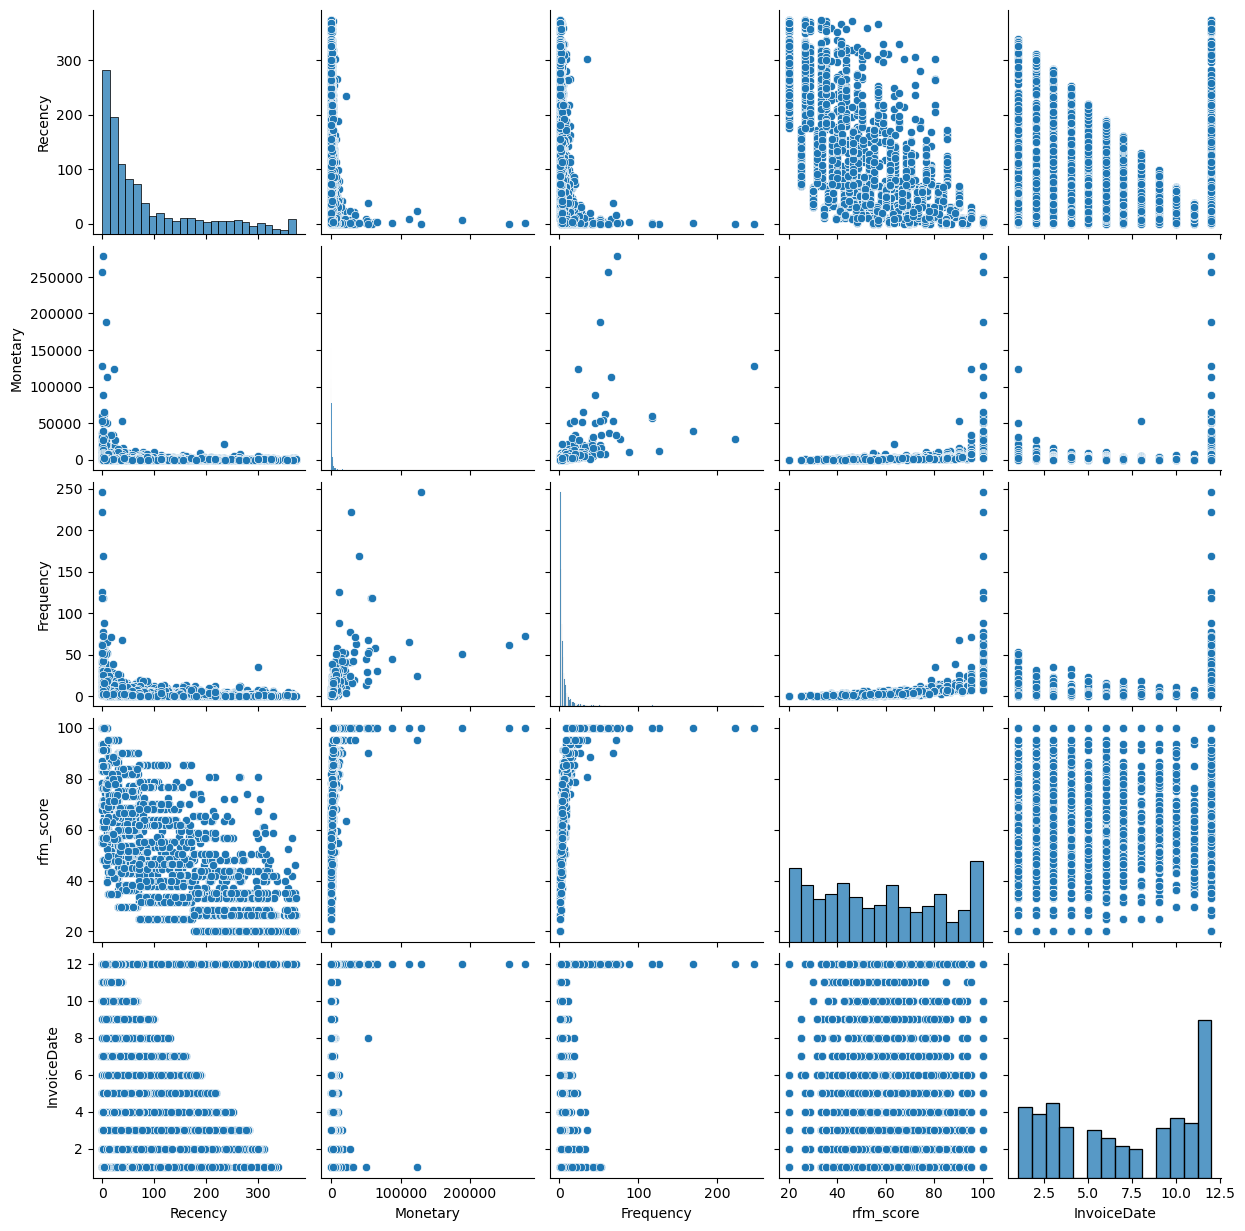

In [130]:
sns.pairplot(temp)

<Axes: >

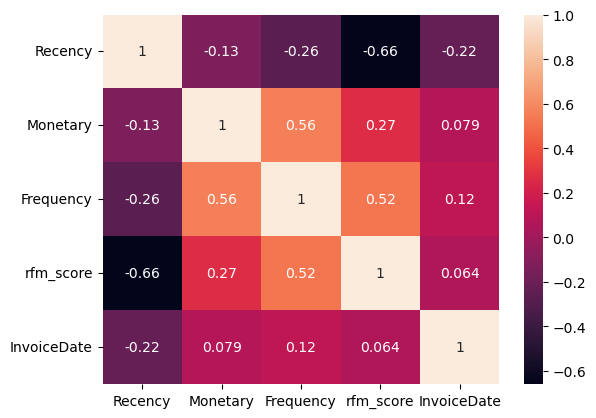

In [129]:
sns.heatmap(temp.corr(), annot=True)

- 이용기간(첫 구매일 ~ 마지막 구매일)과 등급점수, 빈도수는 양의 상관관계를 갖는다.
- Monetary와는 약한 양의 상관관계를 갖는다.

## 이탈자 비율 계산
- 이탈자 : Recency > 90
- 이탈자만 추출
- 이탈자 중 구매횟수가 1회인 고객, 다회인 고객 파악

In [70]:
rfml_df.head()

,CustomerID,Recency,Monetary,Frequency,rfm_score,Length
0,12347,1,4310.00,7,91.419406,365
1,12348,74,1437.24,4,61.671179,282
2,12349,18,1457.55,1,54.258218,0
3,12350,309,294.40,1,26.545292,0
4,12352,35,1265.41,11,83.706480,260


In [71]:
temp = rfml_df[['CustomerID','Recency']].reset_index(drop=True)
temp

,CustomerID,Recency
0,12347,1
1,12348,74
2,12349,18
3,12350,309
4,12352,35
...,...,...
4317,18280,277
4318,18281,180
4319,18282,7
4320,18283,3


In [74]:
churn_df = pd.merge(member_df, temp, on='CustomerID')
churn_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel_Quantity,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,12,08,2.55,17850,United Kingdom,15.30,Completed,Platinum,0,301
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0,301
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,12,08,2.75,17850,United Kingdom,22.00,Completed,Platinum,0,301
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0,301
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0,301


In [78]:
churn_df = churn_df[churn_df['Recency'] >= 90]

- 전체 이탈자 비율

In [81]:
churn_df['CustomerID'].nunique() / member_df['CustomerID'].nunique() * 100

32.78574733919481

- 등급별 이탈자 Recency 평균

In [106]:
chrun_frequency = churn_df.groupby(['CustomerID'])[['InvoiceNo']].count()
len(chrun_frequency[chrun_frequency['InvoiceNo'] == 1]) / len(chrun_frequency[chrun_frequency['InvoiceNo'] >= 1])  * 100

3.4580098800282286

# 객단가

In [151]:
temp = member_df
temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel_Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,12,08,2.55,17850,United Kingdom,15.30,Completed,Platinum,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,12,08,2.75,17850,United Kingdom,22.00,Completed,Platinum,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,12,08,3.39,17850,United Kingdom,20.34,Completed,Platinum,0


In [152]:
temp.groupby(['membership', 'InvoiceNo'])[['Total_bills']].mean().reset_index()

,membership,InvoiceNo,Total_bills
0,Bronze,536384,37.661538
1,Bronze,536393,79.600000
2,Bronze,536403,177.600000
3,Bronze,536409,4.296852
4,Bronze,536420,16.675000
...,...,...,...
21891,Silver,C577362,-11.500000
21892,Silver,C577513,-10.083333
21893,Silver,C577832,-15.992727
21894,Silver,C578003,-11.250000


In [153]:
member_list = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
cost_per_purchase = []
for i in member_list:
    cost_per_purchase.append(temp[temp['membership']==i]['Total_bills'].mean())
cost_per_purchase

[24.324362194428893,
 16.269982657911434,
 15.081998334738618,
 13.82353245531515,
 12.995637708066582]

In [154]:
cost_df = pd.DataFrame({'membership' : member_list, 'aov' : cost_per_purchase})
cost_df

,membership,aov
0,Diamond,24.324362
1,Platinum,16.269983
2,Gold,15.081998
3,Silver,13.823532
4,Bronze,12.995638


In [146]:
member_df[member_df['membership']=='Platinum']['Total_bills'].max(), member_df[member_df['membership']=='Gold']['Total_bills'].max()

(3861.0, 168469.6)

In [149]:
member_df[member_df['Total_bills']==member_df['Total_bills'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel_Quantity
314206,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2011-12-01,12,09,2.08,16446,United Kingdom,168469.6,Completed,Gold,0


In [150]:
member_df[member_df['CustomerID']=='16446']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceMonth,Month,Time,UnitPrice,CustomerID,Country,Total_bills,Transaction_Status,membership,Cancel_Quantity
314204,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,2011-05-01,5,09,1.65,16446,United Kingdom,1.65,Completed,Gold,0
314205,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,2011-05-01,5,09,1.25,16446,United Kingdom,1.25,Completed,Gold,0
314206,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2011-12-01,12,09,2.08,16446,United Kingdom,168469.60,Completed,Gold,0
314207,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2011-12-01,12,09,2.08,16446,United Kingdom,-168469.60,Cancelled,Gold,80995


In [43]:
kmeans_df.head()

,CustomerID,Recency,Monetary,Frequency,R_score,F_score,M_score,Cluster,rfm_score,membership
1,12347,1,4310.00,7,5,4,5,1,91.419406,Diamond
2,12348,74,1437.24,4,2,3,4,1,61.671179,Gold
3,12349,18,1457.55,1,4,1,4,1,54.258218,Gold
4,12350,309,294.40,1,1,1,2,0,26.545292,Bronze
5,12352,35,1265.41,11,3,5,4,1,83.706480,Platinum


In [44]:
membership_df = kmeans_df[['Recency', 'Monetary', 'Frequency', 'membership']]
Diamond = membership_df[membership_df['membership']=='Diamond']
Platinum = membership_df[membership_df['membership']=='Platinum']
Gold = membership_df[membership_df['membership']=='Gold']
Silver = membership_df[membership_df['membership']=='Silver']
Bronze = membership_df[membership_df['membership']=='Bronze']
Diamond

,Recency,Monetary,Frequency,membership
1,1,4310.00,7,Diamond
12,7,6182.98,6,Diamond
15,2,4665.58,13,Diamond
29,21,2423.56,5,Diamond
34,15,2780.66,6,Diamond
...,...,...,...,...
4341,6,2507.56,8,Diamond
4350,38,2274.03,11,Diamond
4352,172,2580.15,8,Diamond
4360,2,3064.78,7,Diamond


In [52]:
from scipy.stats import levene

for i in ['Recency', 'Frequency', 'Monetary']:
    d_rc = list(Diamond[i])
    p_rc = list(Platinum[i])
    g_rc = list(Gold[i])
    s_rc = list(Silver[i])
    b_rc = list(Bronze[i])
    statistic, p_value = levene(d_rc, p_rc, g_rc, s_rc, b_rc)
    print('Statistic', statistic)
    print('p-value', p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print('귀무가설 채택 : 등분산성 존재')
    else:
        print('귀무가설 기각 : 등분산성 존재하지 않음')

Statistic 336.63120312179296
p-value 1.6356975166783156e-252
귀무가설 기각 : 등분산성 존재하지 않음
Statistic 155.5510492636796
p-value 1.6515070101499614e-124
귀무가설 기각 : 등분산성 존재하지 않음
Statistic 51.27593676643443
p-value 3.0418263682007646e-42
귀무가설 기각 : 등분산성 존재하지 않음


In [46]:
df

,value,group
0,4310.00,Diamond
1,6182.98,Diamond
2,4665.58,Diamond
3,2423.56,Diamond
4,2780.66,Diamond
...,...,...
4317,149.48,Bronze
4318,138.90,Bronze
4319,173.90,Bronze
4320,180.60,Bronze
